In [1]:
# Importing the necessary libraries

import warnings 
warnings.filterwarnings('ignore')

# ************** DATA MANIPULATION *****************

import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Understanding Dataset

In [2]:
adult_data_uci_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

adult_column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 
                'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 
                'hours-per-week', 'native-country', 'income']

data = pd.read_csv(adult_data_uci_url, names=adult_column_names)

data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<h3> About the Dataset </h3>

* **Age**: Describes the age of individuals. Continuous.
* **Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: Continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: Number of years spent in education. Continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: Female, Male.
* **capital-gain**: Continuous.
* **capital-loss**: Continuous.
* **hours-per-week**: Continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **salary**: >50K,<=50K

In [3]:
data.shape

(32561, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# column wise missing value check
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
# Unique values in each categorical column

for col in data.select_dtypes(include=['object']).columns:
    print("Unique values for:", col)
    print(data[col].unique())
    print("\n")
    print("*"*40)

Unique values for: workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


****************************************
Unique values for: education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


****************************************
Unique values for: marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


****************************************
Unique values for: occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


****************************************
Unique value

<h3> Observation: </h3>

* The dataset has 32561 rows and 15 columns
* The dataset contains absolutely **no null values**! 
* Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
* There are no Float Datatypes in the dataset.
* Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.
* Although the dataset does not contain any null values, a closer look tells us that there are a lot of **'?'** values in our dataset. We will have to **replace** those values!

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
educational-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


<h3> Observation: </h3>

* The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
* The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
* While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
* The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [8]:
data.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [9]:
data[data == ' ?'] = np.nan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        30725 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       30718 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   31978 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
for col in ['workclass', 'occupation', 'native-country']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [11]:
# column wise missing value check
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<h3> Observation: </h3>

* We can see that the columns **workclass**, **occupation**, and **native-country** contains null values. We would have to find out a way to deal with them!
* There can be many ways to impute missing values, but right now, for the sake of simplicity we would impute them using **mode**!

<h1> Exploratory Data Analysis </h1>


**Before beginning, let us understand a bit about our data.**

<AxesSubplot:xlabel='income', ylabel='count'>

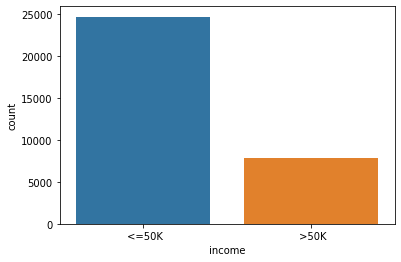

In [12]:
sns.countplot(data=data, x='income')

<h3> Observation: </h3>

In the EDA Section, I wanted to start by analysing our target variable first. We have come across a very obvious observation!

* The number of people earning more than **50K dollars** an year is one third of the people earning less than it.
* We should also keep in mind that this data was collected in **1996**, so 50K dollars of that tme, might not be the same in today's time!

In [13]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

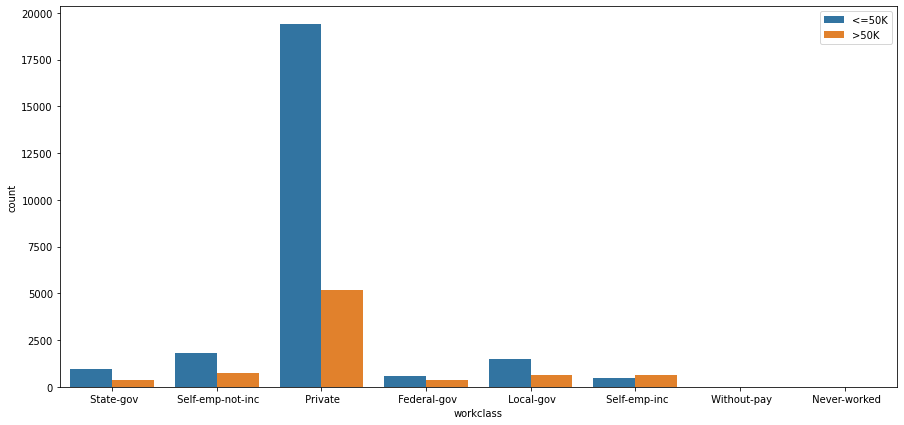

In [14]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x= 'workclass', hue='income')
plt.legend(['<=50K', '>50K'])

<h3> Observation: </h3>

In the above graph, we have segregated the incomes of adults on the basis of their different working classes.

* It is quite interesting to see that **Self-Employed** is the only category where the number of people who earn more than 50K dollars exceed those earning less than it! It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful!
* People working in the **Private Sector** face a significant difference between their pays where more than **75%** of them earn less than 50K dollars an year!
* There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the **Federal Govt.**
* People belonging to the category **Without-Pay** and **Never-Worked** hardly contain any data in both the categories.

In [15]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

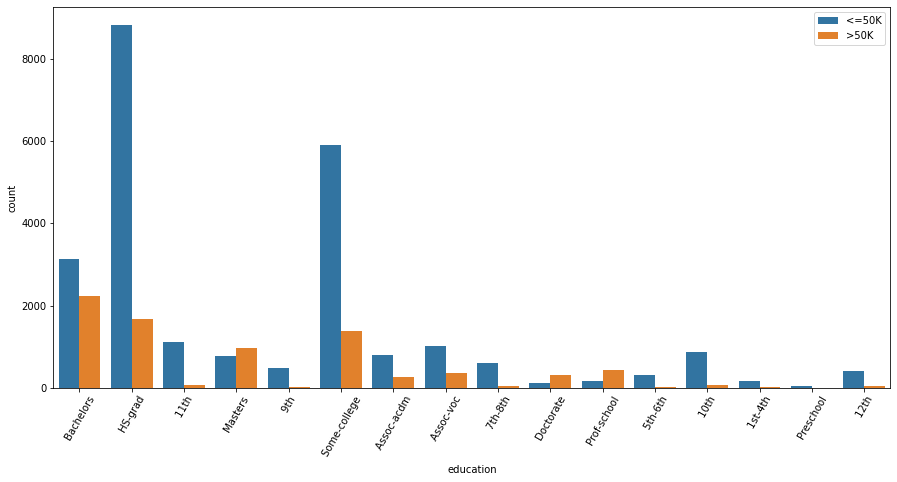

In [16]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x= 'education', hue='income')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])

<h3> Observation: </h3>

We can draw a few insightful conclusions from this graph.

* For the people who have completed their **education up till 12th Standard**, there are just a handful of them who earn more than 50K dollars an year. Most of the people end up earning below 50K!
* For the people belonging to **Bachelors**, **Masters**, **Doctorate**, **Prof-school** category in the education level, there are more number of people who are earning greater than **50K** dollars an year than the number of people earning less than it.
* In case of **Assoc-acdm** or **Assoc-voc**, there are a few people who earn more than **50K** dollars an year!

In [17]:
data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

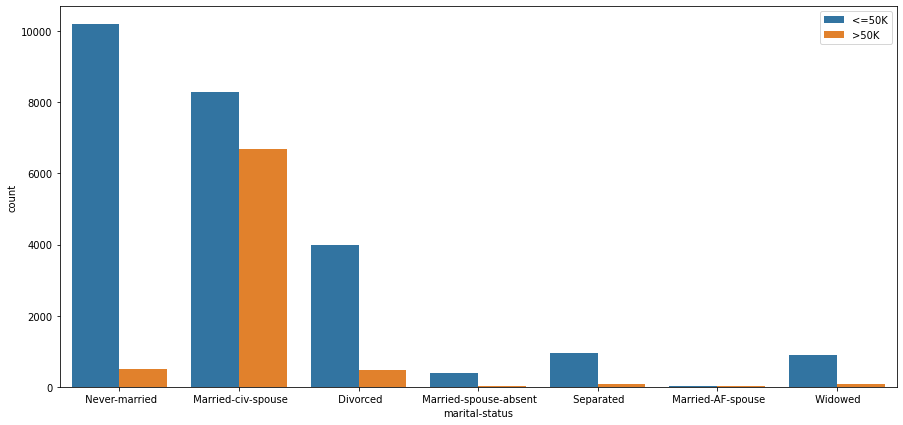

In [18]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x='marital-status',hue='income')
plt.legend(['<=50K', '>50K'])

<h3> Observation: </h3>

* One thing to note here is that **Married-civ-spouse** is the only category which has comparable number of people belonging to both categories. 
* For others, there are less than **25%** of the adults earning more than **50K** dollars an year.

In [19]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

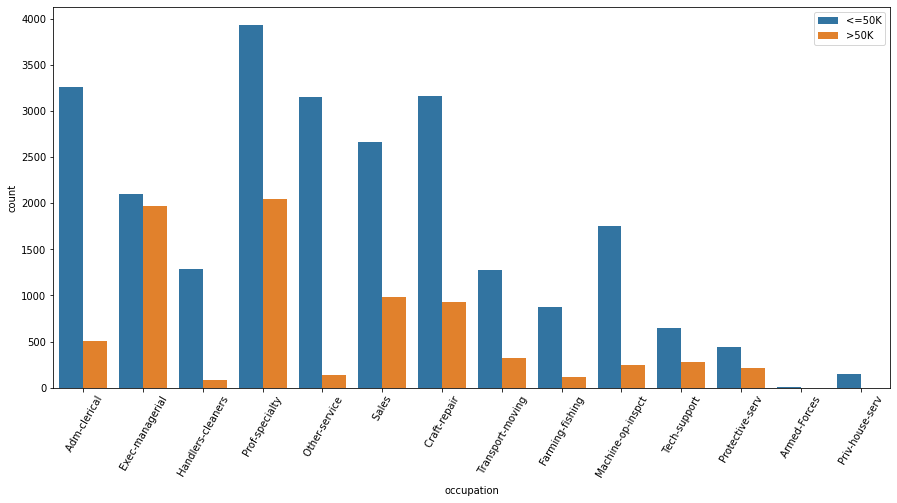

In [20]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x= 'occupation', hue='income')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])

<h3> Observation: </h3>

A few points to note over here:-

* Adults in **Exec-managerial** role are equally likely to earn more than **50K** dollars an year. 
* There's close to **33%** probablity for an adult in **Prof-specialty** to earn more than **50K** dollars an year.
* Adults working in **Farming-fishing**, **Machine-op-inspect**, **Other-service**, **Adm-clerical**, **Transport-moving** are very less likely to earn more than **50K** dollars an year.
* Around **25%** of the people working in **Sales** earn more than **50K** dollars an year.

In [21]:
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

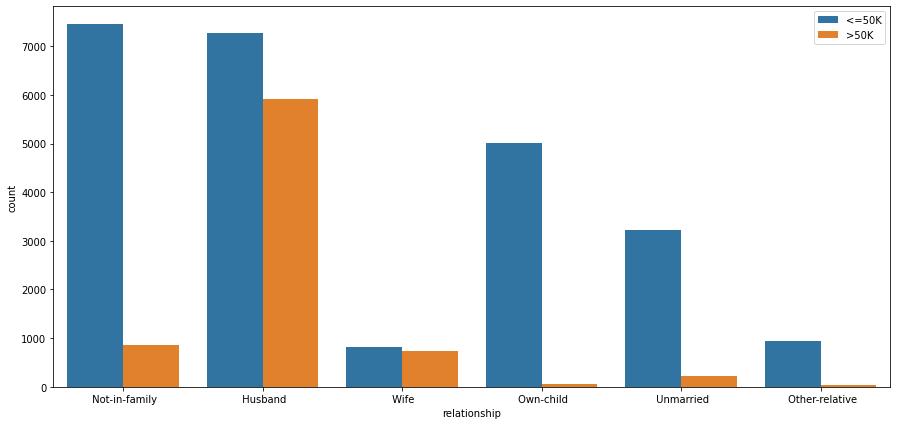

In [22]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x= 'relationship', hue='income')
plt.legend(['<=50K', '>50K'])

<h3> Observation: </h3>

* **Wives** are equally likely to earn more than **50K** dollars an year.
* For **Husbands**, although significant, there is less possibility of them to earn more than **50K** dollars an year.
* There are just a handful of **Unmarried** people earning more than **50K** dollars an year.


In [23]:
data['gender'].unique()

array([' Male', ' Female'], dtype=object)

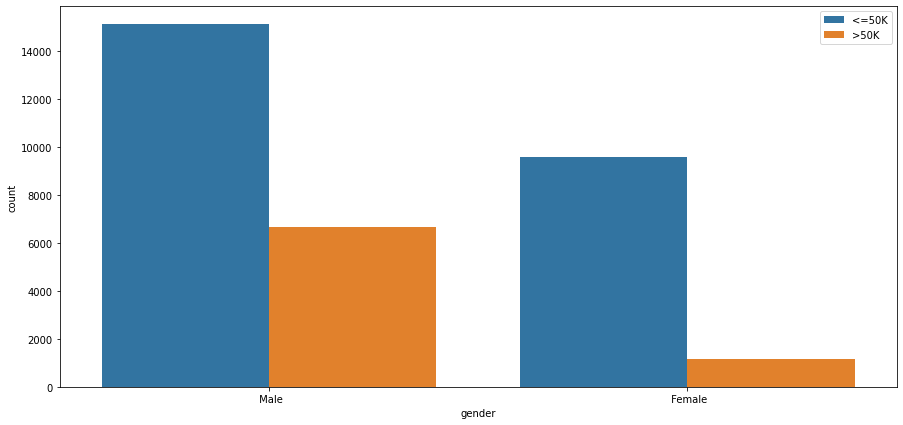

In [24]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x='gender', hue='income')
plt.legend(['<=50K', '>50K'])

<h3> Observation: </h3>

We can see a significant gap in the earnings between males and females over here. 

* For **Females**, there are less than **10%** of the adults earning more than **50K** dollars an year.
* In case of **Males** there are close to **33%** of them earning more than **50K** dollars an year.

In [25]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

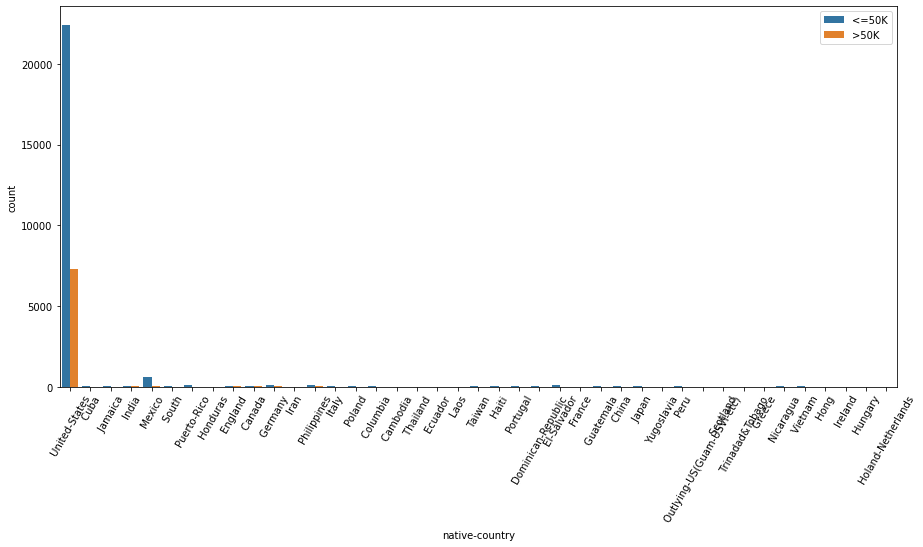

In [26]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x='native-country',hue='income')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])
plt.show()

<h3> Observation: </h3>

An important point to notice over here is that, except **Whites** there are very few people of different races. Due to this one may fail to notice the exact percentage and relationship of people earning more than 50K dollars an year. 

<AxesSubplot:xlabel='income', ylabel='age'>

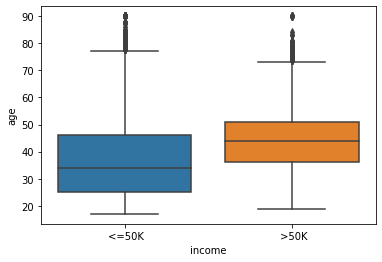

In [27]:
sns.boxplot(data=data, x='income', y='age')

<h3> Observation: </h3>

* People earning **>50K** are more aged at an aggregate level compared to people earning **<=50K**.

<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

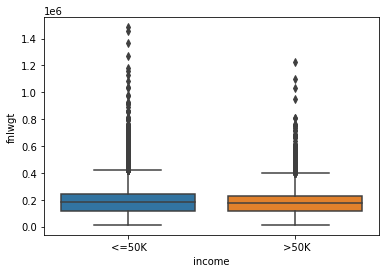

In [28]:
sns.boxplot(data=data, x='income', y='fnlwgt')

<h3> Observation: </h3>

* The 'fnlwgt' is similar for people earning **>50K** as well as people earning **<=50K**.

<AxesSubplot:xlabel='income', ylabel='educational-num'>

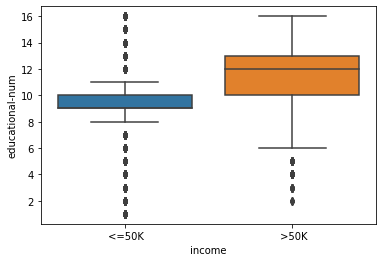

In [29]:
sns.boxplot(data=data, x='income', y='educational-num')

<h3> Observation: </h3>

* People earning **>50K** are more educated at an aggregate level compared to people earning **<=50K**.

<AxesSubplot:xlabel='income', ylabel='capital-gain'>

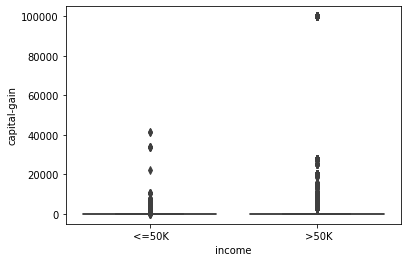

In [30]:
sns.boxplot(data=data, x='income', y='capital-gain')


<h3> Observation: </h3>

* The capital gaim looks similar for People earning **>50K** as well as people earning **<=50K**.
* However, there are more outliers with extremely high capital gains within the **>50K** group

<AxesSubplot:xlabel='income', ylabel='capital-loss'>

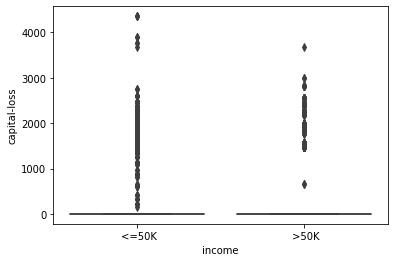

In [31]:
sns.boxplot(data=data, x='income', y='capital-loss')

<h3> Observation: </h3>

* The capital loss looks similar for People earning **>50K** as well as people earning **<=50K**.
* However, there are more outliers with high capital loss within the **<=50K** group

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

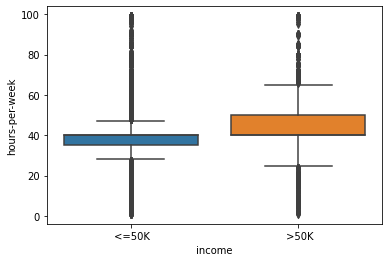

In [32]:
sns.boxplot(data=data, x='income', y='hours-per-week')

<h3> Observation: </h3>

* People earning **>50K** work more hours per week at an aggregate level compared to people earning **<=50K**.

In [33]:
data.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [34]:
# Transforming categorical values of Incomem variable into numerical values 
data['income']=data['income'].replace([' <=50K', ' >50K'],[0,1])
data.income.unique()

array([0, 1], dtype=int64)

> * Class `<=50K` is represented as 0
> * Class `>50K` is represented as 1

<AxesSubplot:>

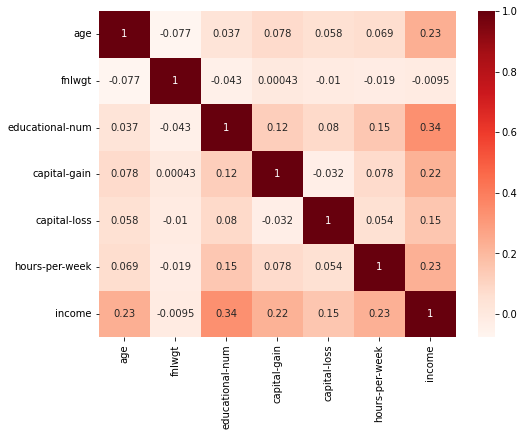

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,cmap='Reds')

<h3> Observation: </h3>

Here, we have tried to plot a correlation map in order to see whether or not the independent features are related to the dependent features.

* We see that most of the features are positively correlated with the **Income Variable**.
* An important thing to note over here is that, we have not covered the object datatypes in this correlation graph. 

# Data Preparation

In [36]:
# Creating 'x' with only input features
x=data.drop(['income'],axis=1)

In [37]:
# Creating 'y' with only target variable
y=data.income

In [38]:
# Viewing top 5 rows of input 'x'
x.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [39]:
# Selecting only Numerical columns in a list
numericalcols=list(data.select_dtypes(exclude='object').columns)
numericalcols.pop()
numericalcols

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

### Transforming Categorical columns

* As the model can take only Numerical features. 
* We transform all non-numerical features into numerical using One Hot Encoding (Dummy encoding)

In [40]:
# Transforming catgeorical features into Dummy encodings
x=pd.get_dummies(x)

In [41]:
# Viewing top 5 rows of input 'x'
x.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Transforming Numerical columns

* It is a good practice to standardize/normalize the numerical features in order to get better performance

In [42]:
# importing libarary
from sklearn.preprocessing import StandardScaler

In [43]:
# viewing numerical columns
numericalcols

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [44]:
# creating standard scaler object
std_scaler=StandardScaler()

In [45]:
# Fitting and transforming the numericl input columns
x[numericalcols]=std_scaler.fit_transform(x[numericalcols])

In [46]:
# Viewing top 5 rows of input 'x'
x.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Model Development and Performance Validation

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

## 1: LogisticRegression

* Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
* Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

* Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.
* Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification. The below image is showing the logistic function:


![Logistic Regression](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)

* Ref: https://www.javatpoint.com/logistic-regression-in-machine-learning

In [48]:
# intitializing the ML model object 
Model1_LR = LogisticRegression(max_iter=400)

For the purpose of model validation, we are using Cross Validation.


### What is Cross Validation?

* Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited. 
* In cross-validation, you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.

* So what is wrong with testing the model on the training dataset? If we do so, we assume that the training data represents all the possible scenarios of real-world and this will surely never be the case. Our main objective is that the model should be able to work well on the real-world data, although the training dataset is also real-world data, it represents a small set of all the possible data points(examples) out there.

#### K-Fold Cross Validation:
* `K-fold cross validation` is one way to improve the holdout method. The data set is divided into k number of subsets and the holdout method is repeated k number of times.

* Because it ensures that every observation from the original dataset has the chance of appearing in training and test set, this method generally results in a less biased model compare to other methods. 

* The disadvantage of this method is that the training algorithm has to be rerun from scratch k times, which means it takes k times as much computation to make an evaluation.

* Ref: https://www.mygreatlearning.com/blog/cross-validation/

In [49]:
# intitializing the K Fold Cross Validation object
kfold = KFold(n_splits=5) # k=5, split the data into 10 equal parts

In [50]:
# executing the ML model using Cross Validation
results= cross_val_score(Model1_LR, x, y, cv=kfold, scoring = "accuracy")

In [51]:
print("Logistic Regression:")
print("Mean Accuracy is ", results.mean())
print("Deviation in Accuracy is ", results.std())

Logistic Regression:
Mean Accuracy is  0.8510796494329428
Deviation in Accuracy is  0.002618557200476291


In [52]:
# Creating empty lists to store results
CV_Accuracy_Mean=[]
CV_Accuracy_StandardDeviation=[]

In [53]:
# Adding model results into combined lists
CV_Accuracy_Mean.append(results.mean())
CV_Accuracy_StandardDeviation.append(results.std())

## 2: Support Vector Classifier

* Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

* The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

* SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:
![SVM](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)


* Ref: https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm

In [54]:
# intitializing the ML model object 
Model2_SVC = SVC()

In [55]:
# executing the ML model using Cross Validation
results= cross_val_score(Model2_SVC, x, y, cv=kfold, scoring = "accuracy")

In [56]:
print("Support Vector Classifier:")
print("Mean Accuracy is ", results.mean())
print("Deviation in Accuracy is ", results.std())

Support Vector Classifier:
Mean Accuracy is  0.8558092376954652
Deviation in Accuracy is  0.003082818324777838


In [57]:
# Adding model results into combined lists
CV_Accuracy_Mean.append(results.mean())
CV_Accuracy_StandardDeviation.append(results.std())

## 3: K - Nearest Neighbors Classifier

* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
* KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.
![KNN](https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png)
* Ref: https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

In [58]:
# intitializing the ML model object 
Model3_KNN = KNeighborsClassifier(n_neighbors=10)

In [59]:
# executing the ML model using Cross Validation
results= cross_val_score(Model3_KNN, x, y, cv=kfold, scoring = "accuracy")

In [60]:
print("K-Nearest Neighbor Classifier:")
print("Mean Accuracy is ", results.mean())
print("Deviation in Accuracy is ", results.std())

K-Nearest Neighbor Classifier:
Mean Accuracy is  0.8404841752895645
Deviation in Accuracy is  0.0030892844377274978


In [61]:
# Adding model results into combined lists
CV_Accuracy_Mean.append(results.mean())
CV_Accuracy_StandardDeviation.append(results.std())

## 4: Decision Tree Classifier

* Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. 
* It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
* It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.

![Decision Tree](https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm2.png)

* Ref: https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm

In [62]:
# intitializing the ML model object 
Model4_DT = DecisionTreeClassifier()

In [63]:
# executing the ML model using Cross Validation
results= cross_val_score(Model4_DT, x, y, cv=kfold, scoring = "accuracy")

In [64]:
print("Decision Tree Classifier:")
print("Mean Accuracy is ", results.mean())
print("Deviation in Accuracy is ", results.std())

Decision Tree Classifier:
Mean Accuracy is  0.8141949469045275
Deviation in Accuracy is  0.004596581318001093


In [65]:
# Adding model results into combined lists
CV_Accuracy_Mean.append(results.mean())
CV_Accuracy_StandardDeviation.append(results.std())

## 5: Random Forest Classifier

* Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique.
* It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

* As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." 

* Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output. The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

* The below diagram explains the working of the Random Forest algorithm:
![Random Forest](https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm2.png)

In [66]:
# intitializing the ML model object 
Model5_RF = RandomForestClassifier()

In [67]:
# executing the ML model using Cross Validation
results= cross_val_score(Model5_RF, x, y, cv=kfold, scoring = "accuracy")

In [68]:
print("Random Forest Classifier:")
print("Mean Accuracy is ", results.mean())
print("Deviation in Accuracy is ", results.std())

Random Forest Classifier:
Mean Accuracy is  0.8545192831120975
Deviation in Accuracy is  0.003342311044830493


In [69]:
# Adding model results into combined lists
CV_Accuracy_Mean.append(results.mean())
CV_Accuracy_StandardDeviation.append(results.std())

## 6: Naive Bayes Classifier

* Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
* Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.
* It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
![Naive Bayes](https://static.javatpoint.com/tutorial/machine-learning/images/naive-bayes-classifier-algorithm.png)

Where,

* P(A|B) is Posterior probability: Probability of hypothesis A on the observed event B.
* P(B|A) is Likelihood probability: Probability of the evidence given that the probability of a hypothesis is true.
* P(A) is Prior Probability: Probability of hypothesis before observing the evidence.
* P(B) is Marginal Probability: Probability of Evidence.


* Ref: https://www.javatpoint.com/machine-learning-naive-bayes-classifier

In [70]:
# intitializing the ML model object 
Model6_NB = GaussianNB()

In [71]:
# executing the ML model using Cross Validation
results= cross_val_score(Model6_NB, x, y, cv=kfold, scoring = "accuracy")

In [72]:
print("Naive Bayes Classifier:")
print("Mean Accuracy is ", results.mean())
print("Deviation in Accuracy is ", results.std())

Naive Bayes Classifier:
Mean Accuracy is  0.5404938186375312
Deviation in Accuracy is  0.01456452925979218


In [73]:
# Adding model results into combined lists
CV_Accuracy_Mean.append(results.mean())
CV_Accuracy_StandardDeviation.append(results.std())

## Model Performance Comparison

In [74]:
# Creating a final DF with all model performances
Model_Performance_DF=pd.DataFrame({'CV_Accuracy_Mean':CV_Accuracy_Mean,
                               'CV_Accuracy_StdDeviation':CV_Accuracy_StandardDeviation}, 
                              index = ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor',
                                       'Decision Tree', 'Random Forest', 'Naive Bayes'])       
Model_Performance_DF

,CV_Accuracy_Mean,CV_Accuracy_StdDeviation
Logistic Regression,0.851080,0.002619
Support Vector Machine,0.855809,0.003083
K-Nearest Neighbor,0.840484,0.003089
Decision Tree,0.814195,0.004597
Random Forest,0.854519,0.003342
Naive Bayes,0.540494,0.014565


> * The performance of all the algorithms is very similar when it comes to the average accuracy.
> * However, `Random Forest` seems to be the best performing by a small margin when looking at mean accuracy and std deviation within accuracy.
> * Hence we will build the final model on `Random Forest Classifier' algorithm

### Final Model Development

In [75]:
# viewing the input features
x.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# viewing the target feature
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

> * Class `<=50K` is represented as 0
> * Class `>50K` is represented as 1

In [77]:
# Dividing the dataset into 75% training and 25% testing sets
from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=11)

In [78]:
# viewing the shapes of dataset
print("Shapes of data:")
print("X Train:", x_train.shape)
print("Y Train:", y_train.shape)
print("X Test:", x_test.shape)
print("Y Test:", y_test.shape)

Shapes of data:
X Train: (24420, 105)
Y Train: (24420,)
X Test: (8141, 105)
Y Test: (8141,)


In [79]:
# intitializing the ML model object  
RF_classifier= RandomForestClassifier(random_state=11) 

In [80]:
# training the classifier on Train data
RF_classifier.fit(x_train, y_train)  

RandomForestClassifier(random_state=11)

In [81]:
# predicting on the test set result  
y_pred_RF = RF_classifier.predict(x_test) 

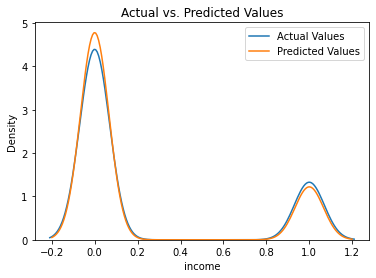

In [82]:
# Visualizing the distribution of Actual Values vs. Predicted Values

ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(y_pred_RF,hist=False,label='Predicted Values')
ax.set_title('Actual vs. Predicted Values')
plt.legend()

> * Looking at the distribution of Actual Values vs. Predicted Values, the distribution looks similar and predicted values are aligned closer to the actual values.
> * This indicates a good fit model

In [83]:
# creating the Confusion matrix 
from sklearn.metrics import confusion_matrix  

cm_RF = confusion_matrix(y_test, y_pred_RF)  
cm_RF

array([[5781,  470],
       [ 703, 1187]], dtype=int64)

[Text(0, 0.5, '<=50K'), Text(0, 1.5, '>50K')]

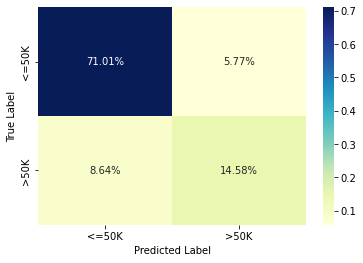

In [84]:
# visualizing the Confusion Matrix
ax = sns.heatmap(cm_RF/np.sum(cm_RF), annot=True,fmt='.2%', cmap="YlGnBu")
ax.set(ylabel="True Label", xlabel="Predicted Label")
ax.set_xticklabels(['<=50K', '>50K'])
ax.set_yticklabels(['<=50K', '>50K'])

> * Out of all the values, 71.01% were correctly classifier as class `<=50K` 
> * Out of all the values, 14.58% were correctly classifier as class `>50K` 

In [85]:
# Viewing the Classification Report
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred_RF))

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6251
           1       0.72      0.63      0.67      1890

    accuracy                           0.86      8141
   macro avg       0.80      0.78      0.79      8141
weighted avg       0.85      0.86      0.85      8141



> __Performance Metrics:__

> * 1. `Accuracy`: Percentage of correct predictions relative to total actual values.
> * 2. `Precision`: Percentage of correct positive class predictions relative to total positive class predictions.
> * 3. `Recall`: Percentage of correct positive class predictions relative to total actual positive class.
> * 4. `F1 Score`: A weighted harmonic mean of precision and recall. The closer to 1, the better the model. <br> F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

> __Model Performance Summary:__

> * In our model, we assume positive class = `>50K` class
> * `Accuracy`: The model was correctly able to predict income class for 86% of the overall people. 
> * `Precision`: Out of all the people that the model predicted having income `>50K`, 72% actually did.
> * `Recall`: Out of all the people that actually had income `>50K`, the model predicted this outcome correctly for 63% of those people.
> * `F1 Score:` The value is 67% which is closer to 1, indicates that the model does a good job of predicting whether the income class of  people is '<=50K' or '>50K'.

### Viewing the factors contributing to the prediction of Income Class

To get the feature importances from the Random Forest model, we use the `feature_importances_` attribute

In [86]:
# Feature importance values from the Random Forest model
RF_classifier.feature_importances_

array([1.46459625e-01, 1.60295013e-01, 6.04476579e-02, 1.00155551e-01,
       3.09089342e-02, 8.61100056e-02, 5.25301639e-03, 5.74349973e-03,
       8.95251221e-06, 1.11393182e-02, 5.79676653e-03, 8.33294236e-03,
       4.70541788e-03, 3.08375477e-05, 1.58588274e-03, 2.36928412e-03,
       8.95359370e-04, 1.94923771e-04, 7.19407961e-04, 2.05044483e-03,
       1.19829672e-03, 2.37433972e-03, 3.29557831e-03, 1.39740140e-02,
       3.84555174e-03, 7.65332303e-03, 8.92242634e-03, 5.53816895e-05,
       4.96635613e-03, 5.23191900e-03, 6.52712068e-03, 4.43810744e-04,
       7.64074878e-02, 8.86039662e-04, 2.39204279e-02, 1.69623266e-03,
       1.64660700e-03, 5.91287983e-03, 1.51869914e-05, 6.87399596e-03,
       1.88115003e-02, 4.22008359e-03, 3.67415102e-03, 4.47498622e-03,
       6.63118934e-03, 1.25012645e-04, 1.02574604e-02, 3.08116549e-03,
       7.22515750e-03, 4.69893652e-03, 4.76150179e-03, 3.61107664e-02,
       8.17238055e-03, 1.58857294e-03, 1.01777078e-02, 4.03578723e-03,
      

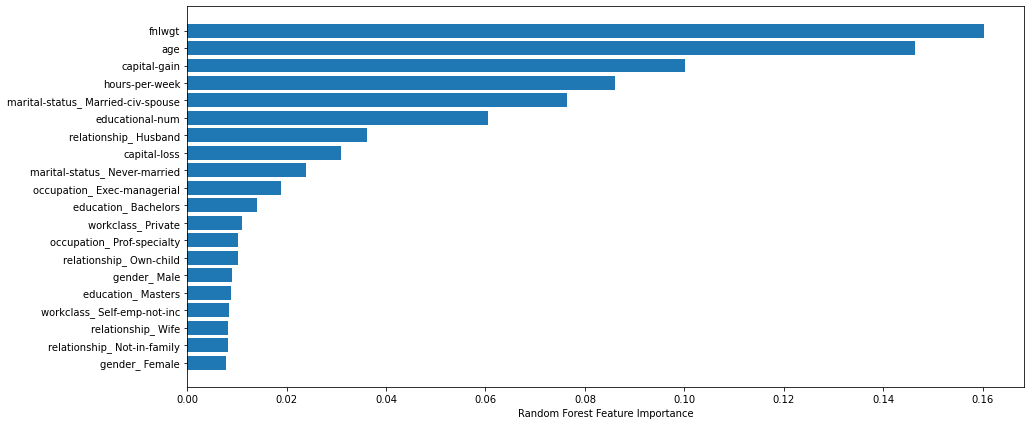

In [87]:
# plot the importances (easier to interpret than values).
sorted_idx = RF_classifier.feature_importances_.argsort()

plt.figure(figsize=(15,7))
plt.barh(x.columns[sorted_idx[-20:]], RF_classifier.feature_importances_[sorted_idx[-20:]]) #only top 20 features
plt.xlabel("Random Forest Feature Importance")
plt.show()

> Based on the feature importance graph, the top-most features responsible to predict the Income Class includes:
> * `fnlwgt`
> * `age`
> * `capital gain`
> * `hours per week`
> * `marital status`
> * `educational-num`
> * `relationship`
> * `capital loss`
> * `occupation`
> * `education`
> * `workclass`
> * `gender`

### Answering the Research Questions:

 * What role/weight does gender have in determining an individual's income?
 * How does an individual's education level affect their income? 
 * How does the hour's work per week play on an individual's income?


> * All the 3 factors (`Gender`, `Education`, `hours per week`) mentioned in the research question do play an important role in determining the income class of an individual.
> * However the top-most factors are `Age`, `Hours per week`, `Marital Status`, `Education` and `Relationship Status`.

### --------------------------------------- End ---------------------------------------